In [1]:
import numpy as np

# 应用机器学习的建议(Advice for Applying Machine Learning)
- **训练集和测试集**：
  - 为了检验算法是否过拟合，我们将数据分成训练集和测试集，通常用70%的数据作为训练集，用剩下30%的数据作为测试集。很重要的一点是训练集和测试集均要含有各种类型的数据，通常我们要对数据进行“洗牌”，然后再分成训练集和测试集
- **交叉验证（cross validation）集**：
  - 假设我们要在10个不同次数的二项式模型之间进行选择，显然越高次数的多项式模型越能够适应我们的训练数据集，但是适应训练数据集并不代表着能推广至一般情况，我们应该选择一个更能适应一般情况的模型。我们需要使用交叉验证集来帮助选择模型。 即：使用60%的数据作为训练集，使用 20%的数据作为交叉验证集，使用20%的数据作为测试集。
  - 这10个二项式模型选择的方法：
    - 使用训练集训练出10个模型；
    - 用10个模型分别对交叉验证集计算得出交叉验证误差——即代价函数的值， 选取值最小的模型
    - 用上述步骤中选出的模型对测试集计算得出推广误差（代价函数的值）

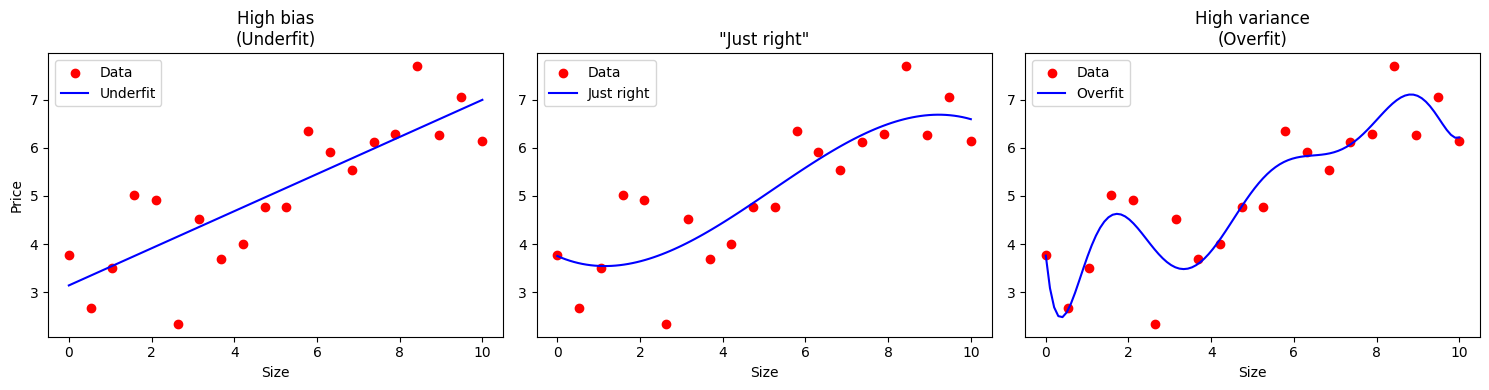

In [7]:
import matplotlib.pyplot as plt

# 生成数据
np.random.seed(0)
x = np.linspace(0, 10, 20)
y = 2 + 0.5*x + np.random.normal(0, 1, x.size)

# 生成用于拟合曲线的 x 值
x_fit = np.linspace(0, 10, 100)

# 创建图形和子图
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 高偏差（欠拟合）
axes[0].scatter(x, y, color='red', label='Data')
# 拟合一条线性曲线: y = θ0 + θ1*x
p = np.poly1d(np.polyfit(x, y, 1))
axes[0].plot(x_fit, p(x_fit), color='blue', label='Underfit')
axes[0].set_title("High bias\n(Underfit)")
axes[0].set_xlabel("Size")
axes[0].set_ylabel("Price")

# 良好拟合
axes[1].scatter(x, y, color='red', label='Data')
# 拟合二次多项式: y = θ0 + θ1*x + θ2*x^2 + + θ3*x^3
p2 = np.poly1d(np.polyfit(x, y, 3))
axes[1].plot(x_fit, p2(x_fit), color='blue', label='Just right')
axes[1].set_title("\"Just right\"")
axes[1].set_xlabel("Size")

# 高方差（过拟合）
axes[2].scatter(x, y, color='red', label='Data')
# 拟合四次多项式: y = θ0 + θ1*x + θ2*x^2 + θ3*x^3 + θ4*x^4....+ θ8*x^8
p4 = np.poly1d(np.polyfit(x, y, 8))
axes[2].plot(x_fit, p4(x_fit), color='blue', label='Overfit')
axes[2].set_title("High variance\n(Overfit)")
axes[2].set_xlabel("Size")

# 添加图例
for ax in axes:
    ax.legend()

plt.tight_layout()
plt.show()


## 正则化的偏差/方差
在我们在训练模型的过程中，一般会使用一些正则化方法来防止过拟合。但是我们可能会正则化的程度太高或太小了，即我们在选择λ的值时也需要思考与刚才选择多项式模型次数类似的问题。

Model: 
$$
h_\theta(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 + \theta_4 x^4
$$

Cost Function:
$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2 + \frac{\lambda}{2m} \sum_{j=1}^{m} \theta_j^2
$$

$\lambda$选择的方法为：
- 使用训练集训练出12个不同程度正则化的模型
- 用12个模型分别对交叉验证集计算的出交叉验证误差
- 选择得出交叉验证误差最小的模型
- 运用步骤3中选出模型对测试集计算得出推广误差

---
## 学习曲线(learning curve)

学习曲线是将训练集误差和交叉验证集误差作为训练集样本数量（m）的函数绘制的图表（一个收敛的图）。

- 如果我们有100行数据，我们从1行数据开始，逐渐学习更多行的数据。
- 思想是：当训练较少行数据的时候，训练的模型将能够非常完美地适应较少的训练数据，但是训练出来的模型却不能很好地适应交叉验证集数据或测试集数据。
- 在高偏差/欠拟合的情况下，增加数据到训练集不一定能有帮助。

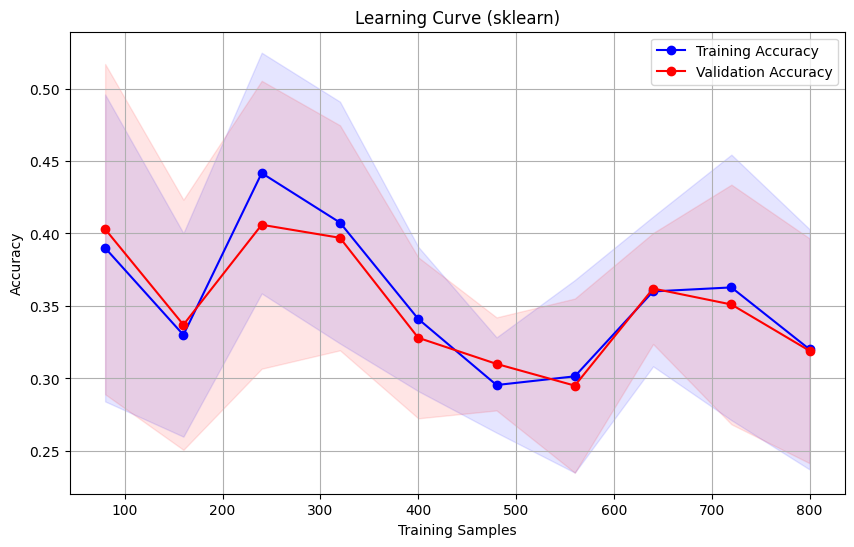

In [9]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification


X, y = make_classification(
    n_samples=1000, n_features=5, n_classes=3, n_informative=3, random_state=42
)

# 创建模型（使用神经网络或逻辑回归等）：将多个步骤按顺序组合成一个整体流程，标准化后是一个神经网络分类器
model = make_pipeline(
    StandardScaler(),
    MLPClassifier(hidden_layer_sizes=(10,), max_iter=1, warm_start=True)  # 1个隐藏层10个神经元
)

train_sizes, train_scores, val_scores = learning_curve(
    estimator=model,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # 10%到100%的训练样本量
    cv=5,                                   # 5折交叉验证
    scoring='accuracy',                     # 也可用 'neg_log_loss'
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, val_mean, 'o-', color='red', label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
plt.xlabel('Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve (sklearn)')
plt.legend()
plt.grid(True)
plt.show()


##  查准率和查全率之间的权衡
|          |          | 预测值       |            |
|----------|----------|--------------|------------|
|          |          | **Positive** | **Negative** |
| 实际值   | **Positive** | TP ：True Positive          | FN  ：False Negative       |
|          | **Negative** | FP  ：False Positive        | TN ：True Negative     |

- 查准率：**$Precision = \frac{true positives}{no. of predicted positives} = TP/(TP+FP)$**
- 查全率： **$Recall = \frac{true positives}{no. of actual positives} = TP/(TP+FN)$**

以诊断肿瘤良性恶性为例子，上述问题体现在错误的诊断（FP,FN）中，到底哪些实际是positive的哪些实际是negative的，这二者加起来的总数应等于错误诊断的总数。所以需要在查准率和查全率中trade off， 一种方法是计算F1 值（F1 Score），其计算公式为：
$F_1 Score = 2\frac{PR}{P+R}$


